In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Chandan\Desktop\Shara\New Shimoga data.csv")
df["arrival_date"] = pd.to_datetime(df["arrival_date"],format="%d-%m-%Y")

In [4]:
#For Shivamogga 
df = df[df["market"] == "Thirthahalli"]

In [5]:
df.variety.value_counts()

Rashi        43
Gorabalu     39
Bette        39
Saraku       38
EDI          38
Sippegotu     4
Name: variety, dtype: int64

In [7]:
df_Rashi = df[df["variety"]=="Rashi"]
df_Rashi.reset_index(drop=False,inplace=True)

df_Gorabalu = df[df["variety"]=="Gorabalu"]
df_Gorabalu.reset_index(drop=False,inplace=True)

#df_Hasa = df[df["variety"]=="Hasa"]
#df_Hasa.reset_index(drop=False,inplace=True)


#df_Bette = df[df["variety"]=="Bette"]
#df_Bette.reset_index(drop=False,inplace=True)


#df_newRashi = df[df["variety"]=="New Rashi Idi"]
#df_newRashi.reset_index(drop=False,inplace=True)


#df_oldRashi = df[df["variety"]=="Old Rashi Idi"]
#df_oldRashi.reset_index(drop=False,inplace=True)


In [8]:
data = df_Rashi[["arrival_date","modal_price"]]

In [10]:
data = data.sort_values("arrival_date")

In [13]:
#indexing date
data.set_index('arrival_date',inplace= True)

#Getting the missing dates
data =data['modal_price'].resample('W', how='mean')
ts = data

C:\Users\Chandan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """


In [19]:
#Replacing missing days with the previous day's value.
ts.fillna(method='ffill',inplace=True)

predicted=31152.165784, expected=29411.000000
predicted=28886.684994, expected=30599.000000
predicted=29417.337559, expected=30599.000000
predicted=30689.955115, expected=31969.000000
predicted=31806.105290, expected=32901.000000
predicted=33339.529453, expected=33201.000000
predicted=33443.491254, expected=33301.000000
predicted=33315.934678, expected=32399.000000
predicted=32284.956803, expected=32299.000000
predicted=31895.523544, expected=31299.500000
predicted=31107.631769, expected=33049.500000
predicted=32563.683086, expected=32000.000000
predicted=32589.030624, expected=33769.500000
predicted=33077.932076, expected=33909.500000
predicted=34572.312313, expected=32111.000000
Test MSE: 1577474.953


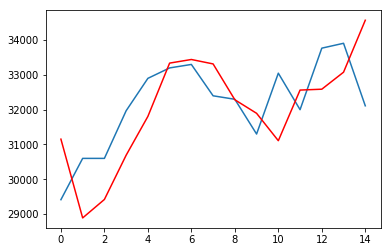

In [26]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
series = ts 
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,))
	model_fit = model.fit(disp=-1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test,predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# Residuals check

In [27]:
residuals = [test[i]-predictions[i] for i in range(len(predictions))]

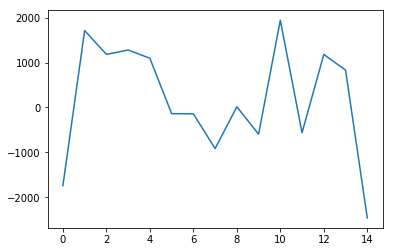

In [28]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(residuals)

In [29]:
residuals = [residuals[i][0] for i in range(0,len(residuals))]

In [30]:
model_fit.resid

array([ -692.14359653,   113.31108439,  -299.30115155,  -409.27658575,
        1103.91209292,  -501.60117157, -1267.89348282,   -15.65586699,
         751.83176409,   199.16574918, -1116.8377755 ,    -6.59004956,
        -127.0747965 ,   725.39179839,   333.21399   ,  1351.9606995 ,
        -259.70432298,   180.59646688,   954.80752683, -1084.95489553,
        -762.82333348,  -630.67997378,  -178.43048608,  -321.5585784 ,
       -1431.74787377,  -176.22390573, -1616.06521927,  1294.43373324,
        1049.14455533,   936.3842846 ,  1058.1389799 ,  -156.2715831 ,
        -212.73097987,  -968.27357642,  -140.15163316,  -587.06918028,
        1785.95091259,  -495.11594978,  1048.90392779,   715.83411887])

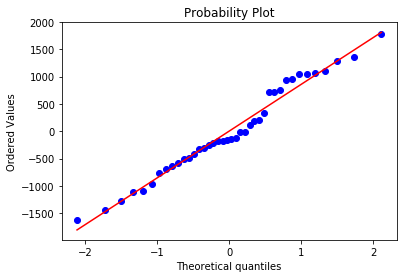

In [31]:
import numpy as np 
import pylab 
import scipy.stats as stats


stats.probplot(model_fit.resid, dist="norm", plot=pylab)
pylab.show()

(array([2., 4., 3., 7., 8., 4., 3., 6., 2., 1.]),
 array([-1616.06521927, -1275.86360608,  -935.6619929 ,  -595.46037971,
         -255.25876653,    84.94284666,   425.14445984,   765.34607303,
         1105.54768621,  1445.7492994 ,  1785.95091259]),
 <a list of 10 Patch objects>)

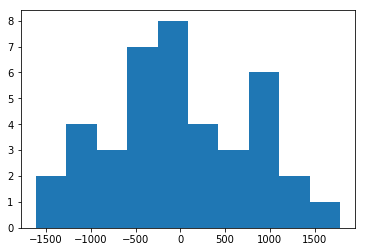

In [32]:
plt.hist(model_fit.resid)

C:\Users\Chandan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if __name__ == '__main__':


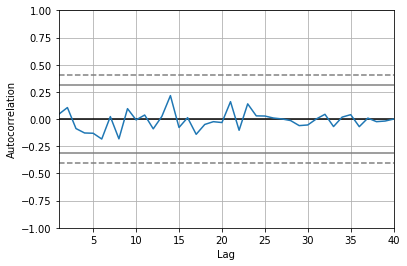

In [33]:
from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
# seed random number generator

# autocorrelation
autocorrelation_plot(model_fit.resid)
pyplot.show()

In [34]:
from sklearn.metrics import mean_absolute_error
import numpy as np
print("MAE")
print(mean_absolute_error(test,predictions))


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test,predictions)
print('Test mape: %.2f' % mape)

print("Accuracy : ", 100-mape)

MAE
1053.0670588586056
Test mape: 4.83
Accuracy :  95.16761077579973
